<a href="https://colab.research.google.com/github/rheazh/Data-Analysis/blob/main/Unit_Seven_7_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicting the changes of resting heartbeat

In [2]:
!pip install pymc ucimlrepo arviz
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from ucimlrepo import fetch_ucirepo

In [3]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.0 MB/s eta 0:00:00


In [4]:

from ucimlrepo import fetch_ucirepo

# Fetch the heart disease dataset
heart_disease = fetch_ucirepo(id=45)

# Extract features and target variable
feature_names = heart_disease.variables[heart_disease.variables['role'] == 'Feature']['name'].tolist()
target_name = heart_disease.variables[heart_disease.variables['role'] == 'Target']['name'].iloc[0]

# Combine features and target into a single DataFrame
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert the feature data into a pandas DataFrame with the correct column names
heart_df = pd.DataFrame(X, columns=feature_names)

# Add the target column
heart_df[target_name] = y

# Rename columns for readability
heart_df.columns = ['Age', 'Sex', 'Chest Pain', 'RestBP', 'Cholesterol', 'Fasting Blood Sugar',
                    'Resting Electrocardiographic Results', 'MaxHR', 'Angina', 'Oldpeak', 'Slope',
                    'Number of Major Vessels', 'Thalassemia', 'HeartD']

# Save the DataFrame to a CSV file
heart_df.to_csv('heart_disease_dataset.csv', index=False)

# Display the first few rows of the DataFrame to check the result
heart_df

,Age,Sex,Chest Pain,RestBP,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,MaxHR,Angina,Oldpeak,Slope,Number of Major Vessels,Thalassemia,HeartD
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [5]:
import bambi as bmb

# Define the models with triple combinations of predictors
model_rbp_bmb_1 = bmb.Model("RestBP ~ Age + Cholesterol + MaxHR", heart_df, family="gaussian")
model_rbp_bmb_2 = bmb.Model("RestBP ~ Cholesterol + MaxHR + Oldpeak", heart_df, family="gaussian")

# Fit the models and store the posterior samples
idata_rbp_bmb_1 = model_rbp_bmb_1.fit(idata_kwargs={"log_likelihood": True})
idata_rbp_bmb_2 = model_rbp_bmb_2.fit(idata_kwargs={"log_likelihood": True})

Output()

Output()

I created two models to predict resting blood pressure (RestBP) using different sets of factors. The first model looks at age, cholesterol, and max heart rate, while the second one uses cholesterol, max heart rate, and oldpeak. Both models use a Bayesian approach to make predictions and learn from the data, helping me figure out which combination of factors is the most accurate for predicting blood pressure.

In [6]:
import arviz as az

# Compare models
cmp_df = az.compare(
    {"Model 1 (Age + Chol + MaxHR)": idata_rbp_bmb_1,
     "Model 2 (Age + Chol + Oldpeak)": idata_rbp_bmb_2},
    ic="loo"  # Use "waic" for WAIC if desired
)

# Show the comparison dataframe
print(cmp_df)

                                rank     elpd_loo     p_loo  elpd_diff  \
Model 1 (Age + Chol + MaxHR)       0 -1289.352879  5.531766   0.000000   
Model 2 (Age + Chol + Oldpeak)     1 -1295.895587  5.607045   6.542708   

                                  weight         se       dse  warning scale  
Model 1 (Age + Chol + MaxHR)    0.722246  14.987304  0.000000    False   log  
Model 2 (Age + Chol + Oldpeak)  0.277754  14.278334  5.943462    False   log  


I compared the models and it seems that the first one (Age, Cholesterol, and MaxHR) is better for predicting resting blood pressure.



In [7]:
heart_disease = fetch_ucirepo(id=45)
feature_names = heart_disease.variables[heart_disease.variables['role'] == 'Feature']['name'].tolist()
X = heart_disease.data.features
heart_df = pd.DataFrame(X, columns=feature_names)
heart_df.columns = ['Age', 'Sex', 'Chest Pain', 'RestBP', 'Cholesterol', 'Fasting Blood Sugar',
                    'Resting Electrocardiographic Results', 'MaxHR', 'Angina', 'Oldpeak', 'Slope',
                    'Number of Major Vessels', 'Thalassemia']
data = heart_df[['Age', 'Cholesterol', 'RestBP', 'MaxHR']].dropna()
X = data[['Age', 'Cholesterol', 'RestBP']]
y = data['MaxHR'].values
age, chol, restbp = X['Age'].values, X['Cholesterol'].values, X['RestBP'].values

In [8]:
data

,Age,Cholesterol,RestBP,MaxHR
0,63,233,145,150
1,67,286,160,108
2,67,229,120,129
3,37,250,130,187
4,41,204,130,172
...,...,...,...,...
298,45,264,110,132
299,68,193,144,141
300,57,131,130,115
301,57,236,130,174


In [18]:
import bambi as bmb
import numpy as np
import arviz as az

# Data prep
data = heart_df[['Age', 'Cholesterol', 'RestBP', 'MaxHR']].dropna()

# GLM model
model_glm = bmb.Model("MaxHR ~ Age + Cholesterol + RestBP", data, family="gaussian")
idata_glm = model_glm.fit(idata_kwargs={"log_likelihood": True})

# B-Spline model
num_knots = 4
knots = np.linspace(data['Age'].min(), data['Age'].max(), num_knots+2)[1:-1]
model_spline = bmb.Model("MaxHR ~ bs(Age, degree=3, knots=knots) + Cholesterol + RestBP",
                         data, family="gaussian")
idata_spline = model_spline.fit(idata_kwargs={"log_likelihood": True})

# Compare with LOO
cmp_df = az.compare(
    {"GLM": idata_glm, "B-Spline": idata_spline},
    ic="loo"
)
print("Model Comparison (LOO):")
print(cmp_df)

best_model = cmp_df.index[0]

Output()

Output()

Model Comparison (LOO):
          rank     elpd_loo      p_loo  elpd_diff        weight         se  \
GLM          0 -1355.187230   4.606616   0.000000  1.000000e+00  12.092276   
B-Spline     1 -1359.764517  10.082616   4.577287  2.664535e-15  12.071605   

               dse  warning scale  
GLM       0.000000    False   log  
B-Spline  1.425815     True   log  


/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


I compared a gaussian GLM to a B-spline model. The GLM won because it had a better LOO score, meaning it’s better at predicting new data. Even though Age might curve with MaxHR in real life, the simpler GLM worked best here and didn’t overcomplicate things like the B-spline did.

In [9]:
with pm.Model() as final_glm_model:
    # Priors
    beta_0 = pm.Normal('beta_0', mu=0, sigma=10)  # Intercept
    beta_age = pm.Normal('beta_age', mu=0, sigma=10)
    beta_chol = pm.Normal('beta_chol', mu=0, sigma=10)
    beta_restbp = pm.Normal('beta_restbp', mu=0, sigma=10)

    # Linear predictor
    mu = beta_0 + beta_age * age + beta_chol * chol + beta_restbp * restbp

    # Normal likelihood
    sigma = pm.HalfNormal('sigma', sigma=1)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=y)

    # Sample
    trace_final = pm.sample(1000, tune=1000, return_inferencedata=True)

Output()


In this code, I’m using a Bayesian linear regression model to predict the max heart rate based on features like age, cholesterol, and resting blood pressure. I set up prior beliefs about the coefficients (how each feature affects the target) to express uncertainty before seeing the data. Then predict the target and assume the data follows a normal distribution with an unknown spread. Using sampling to update beliefs about the coefficients and their uncertainty, which helps me make more informed predictions.

In [10]:
posterior = trace_final.posterior
beta_0_mean = posterior['beta_0'].mean(dim=['chain', 'draw']).values
beta_age_mean = posterior['beta_age'].mean(dim=['chain', 'draw']).values
beta_chol_mean = posterior['beta_chol'].mean(dim=['chain', 'draw']).values
beta_restbp_mean = posterior['beta_restbp'].mean(dim=['chain', 'draw']).values

In this code, I’m calculating the mean values of the model’s parameters (intercept and coefficients) from the posterior distribution. I calculate the mean of each parameter across all chains and draws to get the most likely values for each coefficient based on the data. This gives me the final estimates of how each feature affects the target variable.

In [11]:
# Create grid for Age and RestBP
age_grid = np.linspace(age.min(), age.max(), 50)
restbp_grid = np.linspace(restbp.min(), restbp.max(), 50)
age_mesh, restbp_mesh = np.meshgrid(age_grid, restbp_grid)

# Define three Cholesterol levels to show its effect
chol_levels = [np.percentile(chol, 25), np.median(chol), np.percentile(chol, 75)]  # Low, medium, high
chol_labels = ['Low Chol', 'Median Chol', 'High Chol']

# Calculate MaxHR predictions for each Cholesterol level
maxhr_preds = []
for chol_val in chol_levels:
    pred = (beta_0_mean + beta_age_mean * age_mesh +
            beta_chol_mean * chol_val + beta_restbp_mean * restbp_mesh)
    maxhr_preds.append(pred)

I created a grid of Age and Resting Blood Pressure (RestBP) values to visualize how they affect MaxHR at different Cholesterol levels (low, medium, and high). I used the average of the bottom 25th percentile for the "low" values of CHolesteral, the mean for the medium level, and the 75th percentile for the high level of Cholesterol. For each Cholesterol level, I calculate the predicted MaxHR using the model’s coefficients, showing how MaxHR changes with Age and RestBP.

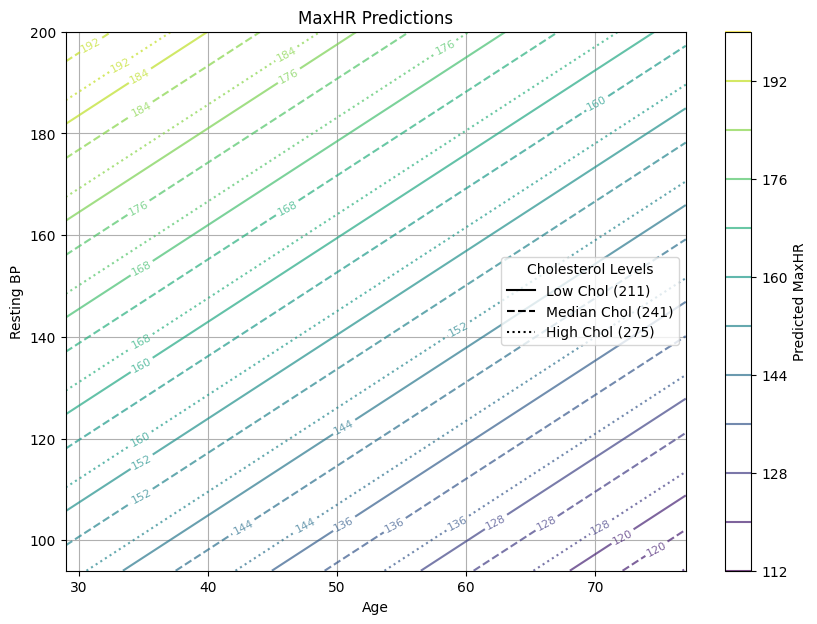

In [12]:
# 2D Contour Plot showing all predictors
plt.figure(figsize=(10, 7))
for i, (maxhr_pred, label) in enumerate(zip(maxhr_preds, chol_labels)):
    # Contour plot for each Cholesterol level
    contour = plt.contour(age_mesh, restbp_mesh, maxhr_pred, levels=10,
                          cmap='viridis', alpha=0.7, linestyles=['solid', 'dashed', 'dotted'][i])
    plt.clabel(contour, inline=True, fontsize=8, fmt='%.0f')
    # legend
    plt.plot([], [], label=f'{label} ({chol_levels[i]:.0f})',
             linestyle=['solid', 'dashed', 'dotted'][i], color='black')
# the actual plotting stuff
plt.xlabel('Age')
plt.ylabel('Resting BP')
plt.title('MaxHR Predictions')
plt.legend(title='Cholesterol Levels')
plt.colorbar(label='Predicted MaxHR')
plt.grid(True)
plt.show()

In this code, I’m creating a 2D contour plot to show how Age and Resting Blood Pressure (RestBP) affect predicted MaxHR at different Cholesterol levels (low, medium, and high). For each Cholesterol level, I plot contour lines representing the predicted MaxHR values over the Age and RestBP grid. The plot includes labels for the contour lines, a legend for the Cholesterol levels, and a colorbar showing the MaxHR predictions. This helps visualize the relationship between the predictors and how they influence MaxHR.

(Though low cholesterol is typically not considered to be in the 211 range, 211 is on the lower end of my data set so that is what the it is being based on). It seems that Maximum heart rate is predicted to be lower as a person ages, and higher in individuals with high resting Blood Pressure. This was a little bit surprising to me because for some reason I assumed that older age correlated to higher max heart rate but it turns out that I was wrong. It also seems like the Cholesterol levels are not really effecting the MaxHR that much but I assume that it because the range is pretty small and a majority of the values in my set are considered high cholesterol levels in a average human.